# Aplying the recomendator system


This notebook is a part of the project Library recomender system. To generet the datases used in this notebook, we have used spiders to colect biblographis registers and users trasactions over many library sites. The bibliograthic registers have been already unificated and associated with a unique identifier class "codObra";

In the previously we used the scikit learning liubrary to reduce the dimentionality of the one hot *WORK vz USER rating matriz . The original one has 1,4 milion of dimention, we reducetd it to 10 dimention. In this notebook, using the *work dataset ratings with 10 dimentions, we aplly nearest neighborhood calgrtinms to find for each work the neares one. These user filter funcitionalit is particular usefull to catalog sistes where show other itens base in pther experience " who saw that also saw : "




<font color=blue>*the same book with diferent editions were agruped in "Work" and has the "codObra" as unique identifier</font>
  



## Firsts let load the bookWeight data set  Aplying the recomendator system

1. id is the dataset order
2. codobra is the "Work" 
identifier
3. f0, f2 ... f99 are the Weight in reducted vector space with 100 dimentions


In [9]:
#!more vectors.txt


In [117]:
import pandas as pd 

booksweight = pd.read_csv('vectors.txt', delimiter =' ')  # doctest: +SKIP

booksweight['id'] =booksweight.index

booksweight.set_index('codobra', inplace=True)
booksweight.head(3)


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f92,f93,f94,f95,f96,f97,f98,"f99,",b,id
codobra,,,,,,,,,,,,,,,,,,,,,
2135,-0.52995,0.99200,-0.72640,0.13349,0.54362,0.10349,-0.010795,0.55004,1.7047,0.81522,...,1.8179,-1.5631,-0.15175,-1.5073,0.15216,1.3783,-0.83391,-0.18300,NaN,0
660,-0.55598,1.02260,-0.74682,0.13526,0.55247,0.12473,0.009669,0.56198,1.7234,0.83466,...,1.8316,-1.5776,-0.16481,-1.5323,0.16783,1.3992,-0.85640,-0.18825,NaN,1
1236,-0.52997,0.97954,-0.70787,0.13557,0.53899,0.11865,0.006231,0.53543,1.6572,0.79065,...,1.7728,-1.5200,-0.15022,-1.4592,0.15243,1.3292,-0.82530,-0.19196,NaN,2



<font color=blue font-size = 19px> Let's plot a graph with some examples </font>

In [142]:

def getweight(codobra) : 
    weight = booksweight.loc[codobra][0:-2].values
    return weight



def getIndexObra(codobra) : 
    weight = booksweight.loc[codobra][101]
    return int(weight)

def getObraIndex(index) : 
    codobra  =booksweight.iloc[index].name
    return int(codobra)


posicao =getIndexObra(1236)
print(posicao)



2


2.0

# Let's meake a graph with  some example



In [120]:
from sklearn.decomposition import PCA   
import matplotlib.pyplot as plt
import numpy as np

def impgrafico(nomes, vetors ):

    pca = PCA(n_components=2)
    vectwodim = PCA(n_components=2).fit_transform(vetors)
    
    plt.style.use('ggplot')    
    plt.figure(figsize=(6,6))
    plt.scatter(vectwodim[:,0], vectwodim[:,1], edgecolors='k', c='r')
    
    i =0
    for frase, (x,y) in zip(nomes, vectwodim):
        plt.text(x+0.05, y+0.05, i)
        i =i +1 
        
    i =0   
    for frase in nomes:
        print(i, frase ) 
        i = i +1     
        
        
    


0 moreninha
1 dom casmurro
2 Harry Potter e a Ordem da Fenix
3 A guerra dos tronos
4 Convite a Filosofia:
5 O Que e Ideologia


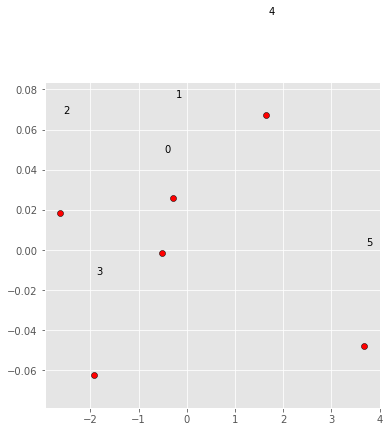

In [122]:
import numpy as np
books = {
    1735: 'moreninha',
    1522 : "dom casmurro",
    
    278  : 'Quem Mexeu no Meu Queijo?', 
    5310: 'Como Fazer Amigos e Influenciar Pessoas',
    2873:'Harry Potter e a Ordem da Fenix',
    26526: 'A guerra dos tronos',
    9948 : 'Convite a Filosofia:',
    30353: 'O Que e Ideologia',
      
}



size =len(books)  
vetorswith = np.zeros((size, 100), dtype=float)
bookenames = [] 
i =0
for  codobra  in books:
    weight = getweight(codobra ) 
    bookenames.append(books[codobra])
    vetorswith[i] = weight
    i = i+1



impgrafico(bookenames, vetorswith)




##  Now  let's calculate for eache work the 10 similary works base on the nearest neighborhood

In [87]:
booksweight.head(2)   

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,"f99,",b
codobra,,,,,,,,,,,,,,,,,,,,,
2135,-0.52995,0.9920,-0.72640,0.13349,0.54362,0.10349,-0.010795,0.55004,1.7047,0.81522,...,0.43942,1.8179,-1.5631,-0.15175,-1.5073,0.15216,1.3783,-0.83391,-0.18300,NaN
660,-0.55598,1.0226,-0.74682,0.13526,0.55247,0.12473,0.009669,0.56198,1.7234,0.83466,...,0.44223,1.8316,-1.5776,-0.16481,-1.5323,0.16783,1.3992,-0.85640,-0.18825,NaN


<font color=blue font-size = 19px>* Lets transform to numpy array to use sklearn library </font>

In [177]:

weights =  booksweight.to_numpy()[0:, 0:-2]

weights.shape

# (133989, 10)


(83291, 100)


<font color=blue size="6">NearestNeighbors find the points (works)  Nearest of each point </font>


In [181]:

from sklearn.neighbors import NearestNeighbors
import numpy as np

nbrs = NearestNeighbors(n_neighbors=10, algorithm='auto',n_jobs=6  ).fit(weights)
distances, indices = nbrs.kneighbors(weights)

print(distances[0])
print(indices[2])


[0.         0.12191462 0.1462635  0.15881043 0.16640503 0.16859704
 0.19444664 0.21182205 0.28951172 0.29579565]
[ 2  6  7  8 10  4  3  5  9  0]


In [192]:
indices.shape
indiceteste = 400
print(distances[indiceteste])
print(indices[indiceteste])

(83291, 10)

In [196]:

def getObraIndex(index) : 
    codobra  =booksweight.iloc[index].name
    return int(codobra)

codobra = getObraIndex(3)

codobra





1117

In [152]:
import pandas as pd 
obreas = pd.read_csv('/home/JobResults/arrumatransacional/obra.cvs')  # doctest: +SKIP
obreas.set_index('codobra', inplace=True)
obreas.head(3)

def getTitobra(codobra):
    try:
        return obreas.loc[codobra]['titulo']
    except:
        return ""


getTitobra(660)


'Crepusculo'

## Reduzindo a dimensionalida para 2 e colocando nosso exemplos em um gráfico




In [200]:

def getitulorec(codobra):
    index =  getIndexObra(codobra)
    indexesObra  = indices[index]
    result = ''

    for indexObra in indexesObra:
        codobrat =  getObraIndex(indexObra)
        titulo =  getTitobra(codobrat)
        result =  result + '   ' +str(codobrat) +  ' ' +titulo + '\n'
    return result[3:]

       

obras = getitulorec(660)
print(obras)

    

    
    


660 Crepusculo
   2135 O_pequeno_príncipe
   1117 Harry_Potter_e_o_calice_de_fogo_____e_o_calice_de_fogo
   7822 Harry_Potter_e_as_Relíquias_da_Morte
   4150 Eclipse
   4124 Harry_Potter_e_o_Enigma_do_Principe
   220 A_Menina_Que_Roubava_Livros
   1236 Harry_Potter
   5079 O_Ladrao_de_Raios
   650 Lua_Nova



In [201]:

books = {
    1735: 'moreninha',
    1522 : "dom casmurro",
    2172 : "Quincas Borba: ",
    278  : 'Quem Mexeu no Meu Queijo?', 
    5310: 'Como Fazer Amigos e Influenciar Pessoas',
    1117  : 'Fundamentos da metafisica dos costumes ',
        
    17180 : 'pai rico',
    9948 : 'Convite a Filosofia:',
    
    277  : 'Grande sertao Veredas',
    2873:'Harry Potter e a Ordem da Fenix',
    6970: 'Matematica divertida e curiosa',
    223802: 'matematica fundamentos ' ,
    24459: 'O que e literatura:'  ,
    26526: 'A guerra dos tronos',
    30353: 'O Que e Ideologia',
      
}


for x in books:
    resultado = getitulorec(x)
    print(resultado )





1735 Memorias_postumas_de_Bras_Cubas
   6437 Nada_dura_para_sempre
   126308 Indomada
   2186 A_Ilha_perdida
   1189 Um_estudo_em_vermelho
   16183 A_maldição_do_tigre
   1828 Vidas_secas
   124910 Fani_Na_Terra_Da_Rainha
   13748 O_Diario_De_Um_Banana
   21292 Terra_de_sombras

1522 Dom_Casmurro
   2218 O_misterio_do_cinco_estrelas
   4512 O_Garoto_da_Casa_ao_Lado
   2807 Nunca_Desista_de_seus_Sonhos
   984 Dracula:__Intermediate_Level_story
   5354 Comedias_para_se_Ler_na_Escola
   4442 A_Princesa_Apaixonada
   4724 Praticamente_Inofensiva
   10772 O_Natal_de_Poirot
   10848 Cai_O_Pano

2172 Quincas_Borba
   28384 As_experiências_de_Tíbio_e_Perônio
   143584 Naruto_#30
   379634 A_mão_e_a_luva
   305007 O_código_Da_Vinci
   46047 Palavras_Que_Nunca_Te_Direi
   23890 Gincana_da_morte
   14191 A_capital_da_solidão
   211146 Disciplina
   102417 A_Cizânia

278 Quem_Mexeu_no_Meu_Queijo?
   14872 Crescendo
   7643 Aventuras_de_Alice_no_Pais_das_Maravilhas_e_Atraves_do_Espelho_e_o_que_Alic


## Now, Let's traduce the table index to CodObra in order to export the nears works of each work base on "codObra"

In [76]:
booksweight.head(2)


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,"f99,",b
codobra,,,,,,,,,,,,,,,,,,,,,
2135,-0.52995,0.9920,-0.72640,0.13349,0.54362,0.10349,-0.010795,0.55004,1.7047,0.81522,...,0.43942,1.8179,-1.5631,-0.15175,-1.5073,0.15216,1.3783,-0.83391,-0.18300,NaN
660,-0.55598,1.0226,-0.74682,0.13526,0.55247,0.12473,0.009669,0.56198,1.7234,0.83466,...,0.44223,1.8316,-1.5776,-0.16481,-1.5323,0.16783,1.3992,-0.85640,-0.18825,NaN


In [83]:
weights =  booksweight.to_numpy()[0:, 0: -1]
weights[1]

array([-0.55598  ,  1.0226   , -0.74682  ,  0.13526  ,  0.55247  ,
        0.12473  ,  0.0096692,  0.56198  ,  1.7234   ,  0.83466  ,
       -0.31927  ,  0.67659  ,  0.75782  ,  0.63206  , -0.80169  ,
        0.54383  , -0.055448 ,  0.601    , -0.16968  , -0.77295  ,
        0.25661  ,  1.0711   ,  0.40957  , -1.       ,  0.26077  ,
       -0.54601  ,  0.79746  , -0.34864  , -0.65896  ,  1.4711   ,
       -0.7156   , -0.42371  , -0.59915  , -1.1305   , -1.1561   ,
       -0.11934  ,  0.36635  , -1.1551   , -0.53878  , -0.89919  ,
        1.0973   ,  0.79375  ,  0.26765  ,  0.6696   ,  0.10148  ,
       -0.2933   , -0.035827 , -0.095411 , -0.78685  , -0.19814  ,
       -1.0806   ,  0.56093  , -1.1085   ,  1.0848   , -0.062551 ,
       -1.2054   ,  0.013301 ,  0.49936  ,  0.67987  ,  0.52702  ,
       -0.058739 ,  0.36907  ,  1.5726   ,  0.46692  , -0.099697 ,
       -0.017229 , -0.58794  ,  0.72098  ,  0.87476  ,  0.57546  ,
       -1.2026   ,  0.054283 , -0.59382  ,  0.09953  , -0.3715

In [66]:

def getTitobra(codobra):
    try:
        return obreas.loc[codobra]['tit']
    except:
        return ""

def getindexCodObra(codobra):
    return int(booksweight.loc[codobra]['id'])



def getCodObra(indice):
    return booksweight.iloc[indice].name



[  5590. 219771.  64103. 179171. 140669. 165576. 374013. 293639. 284051.
 144384.]


In [ ]:
for i in range(size):
    indices_obras[i] =  getCodObras(indices[i])


In [72]:
print(indices_obras[345])

[  9650.  10877. 146482. 345849.  30703.  96422. 337819. 381355. 199063.
 283548.]


In [71]:

cab = 'codobra, codobra, codobra,codobra,codobra,codobra,codobra,codobra,codobra,codobra'
np.savetxt("recomendacoes.csv", indices_obras, delimiter=',', header=cab)

